In [1]:
import numpy as np
import pandas as pd
import pickle
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

import FixedEffectModelPyHDFE.api as FEM
from fixedeffect.fe import fixedeffect, did, getfe

from fixedeffect.fe import fixedeffect # for 3-way fixed https://pypi.org/project/FixedEffectModel/
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib

import seaborn as sns

matplotlib.rcParams['font.family'] = 'serif'

In [2]:
data_dir = '/home/simon/Documents/Bodies/data/done_dfs/'

with open(f'{data_dir}bodies_df_2022_v1_4.pkl', 'rb') as file:
    bodies_df = pickle.load(file)

In [3]:
# if you only want more robust observatino:

bodies_df = bodies_df[(bodies_df['distance_days'] <= 48) | (bodies_df['location_annot'] == 1)].copy() # only locations you are certain of
bodies_df = bodies_df[bodies_df['city'] != 'nan']

bodies_df = bodies_df[bodies_df['year'] >= 2003]
lwd = [294, 299, 300] # likely wrong dates/months. 
bodies_df = bodies_df[~bodies_df['month_id'].isin(lwd)].copy()

# indtil det er styr på det her:
bodies_df = bodies_df[bodies_df['publication'] != 'Published']

In [4]:
#bodies_df[['Published', 'Raw', 'Submitted']] = pd.get_dummies(bodies_df[['publication']])
bodies_df[['Raw', 'Submitted']] = pd.get_dummies(bodies_df[['publication']])

bodies_df.drop(columns= 'publication', inplace= True)

# for FE
bodies_df.set_index(['gid', 'month_id'], inplace = True)

In [5]:
bodies_df = bodies_df[bodies_df['person_mean']>0]

bodies_df['lgarments'] = np.log(bodies_df['religiousGarmentFemale_mean'] + 1)
bodies_df['lfemale'] = np.log(bodies_df['female_mean'] + 1)
bodies_df['lperson'] = np.log(bodies_df['person_mean'] + 1)
bodies_df['luniformed'] = np.log(bodies_df['uniformed_mean'] + 1)
bodies_df['lfirearm'] = np.log(bodies_df['firearm_mean'] + 1)
bodies_df['lmilitaryVehicle'] = np.log(bodies_df['militaryVehicle_mean'] + 1)


bodies_df['uniform_dummy'] = (bodies_df['uniformed_mean'] > 0)*1
bodies_df['person_dummy'] = (bodies_df['person_mean'] > 0)*1
bodies_df['firearm_dummy'] = (bodies_df['firearm_mean'] > 0)*1
bodies_df['female_dummy'] = (bodies_df['female_mean'] > 0)*1
bodies_df['militaryVehicle_dummy'] = (bodies_df['militaryVehicle_mean'] > 0)*1



bodies_df['female_dummy'] = (bodies_df['female_mean'] > 0)*1
bodies_df['garment_dummy'] = (bodies_df['religiousGarmentFemale_mean'] > 0)*1

bodies_df['pp'] = bodies_df['public_mean'] - bodies_df['privat_mean']
bodies_df['log_best_public'] = bodies_df['log_best'] * bodies_df['pp']


# public_df = bodies_df[(bodies_df['pp']>0)&(bodies_df['person_mean']>0)]
# privat_df = bodies_df[(bodies_df['pp']<0)&(bodies_df['person_mean']>0)]

public_df = bodies_df[bodies_df['pp']>0]
privat_df = bodies_df[bodies_df['pp']<0]

In [6]:
results_dict = {}

**gendered**
- women
- garments

**Sanitazion**
- Uniforms
- Vehicles ---
- firearms

- Destruction
- Militarized
- mass protest

In [7]:
# make better public and better rural/urban

# Gender
## Female

In [8]:

X = bodies_df.loc[:,['lfemale']] 
#X = sm.add_constant(X)
y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model1 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfemale', 'lperson']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model2 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfemale', 'lperson', 'public_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model3 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfemale', 'lperson', 'public_mean', 'rural_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model4 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfemale', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model5 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfemale', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'luniformed']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model6 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfemale', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'luniformed', 'log_best']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model7 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)


print(compare({"model1": model1, "model2": model2, "model3": model3, "model4": model4, "model5": model5, "model6": model6, "model7": model7}, precision = 'std_errors', stars = True))

                                                      Model Comparison                                                     
                                model1        model2        model3         model4        model5        model6        model7
---------------------------------------------------------------------------------------------------------------------------
Dep. Variable                Submitted     Submitted     Submitted      Submitted     Submitted     Submitted     Submitted
Estimator                     PanelOLS      PanelOLS      PanelOLS       PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                123826        123826        123826         123826        123826        123826        123826
Cov. Est.                    Clustered     Clustered     Clustered      Clustered     Clustered     Clustered     Clustered
R-squared                       0.0001        0.0001        0.0002         0.0002        0.0005        0.0006        0.0027
R-Square

In [9]:
results_dict['lfemale'] = [0.0070, 0.0013]

## Garments

In [10]:

X = bodies_df.loc[:,['lgarments']] 
#X = sm.add_constant(X)
y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model1 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lgarments', 'lfemale']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model2 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lgarments', 'lfemale', 'public_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model3 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lgarments', 'lfemale', 'public_mean', 'rural_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model4 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lgarments', 'lfemale', 'public_mean', 'rural_mean', 'nlights_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model5 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lgarments', 'lfemale', 'public_mean', 'rural_mean', 'nlights_mean', 'luniformed']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model6 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)


X = bodies_df.loc[:,[ 'lgarments', 'lfemale', 'public_mean', 'rural_mean', 'nlights_mean', 'luniformed', 'log_best']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model7 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)


print(compare({"model1": model1, "model2": model2, "model3": model3, "model4": model4, "model5": model5, "model6": model6, "model7": model7}, precision = 'std_errors', stars = True))

                                                      Model Comparison                                                     
                               model1         model2         model3        model4        model5        model6        model7
---------------------------------------------------------------------------------------------------------------------------
Dep. Variable               Submitted      Submitted      Submitted     Submitted     Submitted     Submitted     Submitted
Estimator                    PanelOLS       PanelOLS       PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations               123826         123826         123826        123826        123826        123826        123826
Cov. Est.                   Clustered      Clustered      Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                   6.338e-05         0.0001         0.0002        0.0002        0.0005        0.0006        0.0027
R-Square

In [11]:
results_dict['lgarments'] = [0.0029, 0.0023]

# Sanitazion
## Uniforms

In [12]:
bodies_df[['luniformed', 'lfirearm']].corr()

,luniformed,lfirearm
luniformed,1.000000,0.461018
lfirearm,0.461018,1.000000


In [13]:

X = bodies_df.loc[:,['luniformed']] 
#X = sm.add_constant(X)
y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model1 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'luniformed', 'lperson']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model2 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'luniformed', 'lperson', 'public_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model3 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'luniformed', 'lperson', 'public_mean', 'rural_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model4 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'luniformed', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model5 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'luniformed', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'log_best']]  # ,firearm_mean
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model6 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

print(compare({"model1": model1, "model2": model2, "model3": model3, "model4": model4, "model5": model5, "model6": model6}, precision = 'std_errors', stars = True))

                                              Model Comparison                                              
                               model1        model2        model3         model4        model5        model6
------------------------------------------------------------------------------------------------------------
Dep. Variable               Submitted     Submitted     Submitted      Submitted     Submitted     Submitted
Estimator                    PanelOLS      PanelOLS      PanelOLS       PanelOLS      PanelOLS      PanelOLS
No. Observations               123826        123826        123826         123826        123826        123826
Cov. Est.                   Clustered     Clustered     Clustered      Clustered     Clustered     Clustered
R-squared                   5.497e-05     6.767e-05     9.478e-05         0.0001        0.0004        0.0025
R-Squared (Within)            -0.0002       -0.0002       -0.0002     -7.139e-05       -0.0482       -0.2760
R-Squared (Between)

In [14]:
results_dict['luniformed'] = [-0.0075, 0.0047]

## Vehicles


In [15]:

X = bodies_df.loc[:,['lmilitaryVehicle']] 
#X = sm.add_constant(X)
y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model1 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lmilitaryVehicle', 'lperson']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model2 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lmilitaryVehicle', 'lperson', 'public_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model3 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lmilitaryVehicle', 'lperson', 'public_mean', 'rural_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model4 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lmilitaryVehicle', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model5 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lmilitaryVehicle', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'log_best']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model6 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

print(compare({"model1": model1, "model2": model2, "model3": model3, "model4": model4, "model5": model5, "model6": model6}, precision = 'std_errors', stars = True))

                                              Model Comparison                                              
                               model1        model2        model3         model4        model5        model6
------------------------------------------------------------------------------------------------------------
Dep. Variable               Submitted     Submitted     Submitted      Submitted     Submitted     Submitted
Estimator                    PanelOLS      PanelOLS      PanelOLS       PanelOLS      PanelOLS      PanelOLS
No. Observations               123826        123826        123826         123826        123826        123826
Cov. Est.                   Clustered     Clustered     Clustered      Clustered     Clustered     Clustered
R-squared                   3.135e-05     4.046e-05     4.366e-05      4.879e-05        0.0004        0.0024
R-Squared (Within)          7.148e-05     8.725e-05     8.597e-05     -4.277e-06       -0.0456       -0.2649
R-Squared (Between)

In [16]:
results_dict['lmilitaryVehicle'] = [0.0092, 0.0094]

## firearms

In [17]:

X = bodies_df.loc[:,['lfirearm']] 
#X = sm.add_constant(X)
y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model1 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfirearm', 'lperson']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model2 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfirearm', 'lperson', 'public_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model3 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfirearm', 'lperson', 'public_mean', 'rural_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model4 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfirearm', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model5 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'lfirearm', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'log_best']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model6 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,['lfirearm', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'log_best', 'luniformed']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model7 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

print(compare({"model1": model1, "model2": model2, "model3": model3, "model4": model4, "model5": model5, "model6": model6, "model7": model7}, precision = 'std_errors', stars = True))

                                                     Model Comparison                                                    
                               model1        model2        model3        model4        model5        model6        model7
-------------------------------------------------------------------------------------------------------------------------
Dep. Variable               Submitted     Submitted     Submitted     Submitted     Submitted     Submitted     Submitted
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations               123826        123826        123826        123826        123826        123826        123826
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                   5.083e-05     5.474e-05     5.851e-05     6.454e-05        0.0004        0.0024        0.0026
R-Squared (Within)      

In [18]:
results_dict['lfirearm'] = [0.0132, 0.0040]

## Destruction

In [19]:

X = bodies_df.loc[:,['damaged_property_mean']] 
#X = sm.add_constant(X)
y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model1 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'damaged_property_mean', 'lperson']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model2 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'damaged_property_mean', 'lperson', 'public_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model3 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'damaged_property_mean', 'lperson', 'public_mean', 'rural_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model4 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'damaged_property_mean', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model5 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'damaged_property_mean', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'log_best']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model6 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)


X = bodies_df.loc[:,[ 'damaged_property_mean', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'log_best', 'luniformed']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model7 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)



print(compare({"model1": model1, "model2": model2, "model3": model3, "model4": model4, "model5": model5, "model6": model6, "model7": model7}, precision = 'std_errors', stars = True))

                                                      Model Comparison                                                     
                                 model1        model2        model3        model4        model5        model6        model7
---------------------------------------------------------------------------------------------------------------------------
Dep. Variable                 Submitted     Submitted     Submitted     Submitted     Submitted     Submitted     Submitted
Estimator                      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 123826        123826        123826        123826        123826        123826        123826
Cov. Est.                     Clustered     Clustered     Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                     9.532e-05        0.0001        0.0001        0.0003        0.0006        0.0026        0.0028
R-Square

In [20]:
results_dict['damaged_property_mean'] = [0.0099, 0.0028]

## Militarized

In [21]:

X = bodies_df.loc[:,['militarized_mean']] 
#X = sm.add_constant(X)
y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model1 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'militarized_mean', 'lperson']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model2 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'militarized_mean', 'lperson', 'public_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model3 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'militarized_mean', 'lperson', 'public_mean', 'rural_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model4 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'militarized_mean', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model5 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'militarized_mean', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'log_best']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model6 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

print(compare({"model1": model1, "model2": model2, "model3": model3, "model4": model4, "model5": model5, "model6": model6}, precision = 'std_errors', stars = True))

                                               Model Comparison                                              
                               model1        model2        model3         model4        model5         model6
-------------------------------------------------------------------------------------------------------------
Dep. Variable               Submitted     Submitted     Submitted      Submitted     Submitted      Submitted
Estimator                    PanelOLS      PanelOLS      PanelOLS       PanelOLS      PanelOLS       PanelOLS
No. Observations               123826        123826        123826         123826        123826         123826
Cov. Est.                   Clustered     Clustered     Clustered      Clustered     Clustered      Clustered
R-squared                      0.0002        0.0002        0.0002         0.0004        0.0007         0.0029
R-Squared (Within)            -0.0003       -0.0003       -0.0004      2.801e-05       -0.0528        -0.2927
R-Squared 

In [22]:
results_dict['militarized_mean'] = [-0.0174, 0.0066]

## mass protest

In [23]:

X = bodies_df.loc[:,['mass_protest_mean']] 
#X = sm.add_constant(X)
y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model1 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'mass_protest_mean', 'lperson']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model2 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'mass_protest_mean', 'lperson', 'public_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model3 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'mass_protest_mean', 'lperson', 'public_mean', 'rural_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model4 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'mass_protest_mean', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model5 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'mass_protest_mean', 'lperson', 'public_mean', 'rural_mean', 'nlights_mean', 'log_best']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model6 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)


print(compare({"model1": model1, "model2": model2, "model3": model3, "model4": model4, "model5": model5, "model6": model6}, precision = 'std_errors', stars = True))

/home/simon/anaconda3/envs/scikit_env/lib/python3.8/site-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


                                               Model Comparison                                               
                               model1        model2         model3        model4         model5         model6
--------------------------------------------------------------------------------------------------------------
Dep. Variable               Submitted     Submitted      Submitted     Submitted      Submitted      Submitted
Estimator                    PanelOLS      PanelOLS       PanelOLS      PanelOLS       PanelOLS       PanelOLS
No. Observations               123826        123826         123826        123826         123826         123826
Cov. Est.                   Clustered     Clustered      Clustered     Clustered      Clustered      Clustered
R-squared                      0.0004        0.0004         0.0007        0.0007         0.0010         0.0030
R-Squared (Within)             0.0003        0.0003         0.0006        0.0006        -0.0367        -0.2464
R

/home/simon/anaconda3/envs/scikit_env/lib/python3.8/site-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


In [24]:
results_dict['mass_protest_mean'] = [0.0274, 0.0066]

# Violence

In [25]:

X = bodies_df.loc[:,['log_best']] 
#X = sm.add_constant(X)
y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model1 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'log_best', 'militarized_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model2 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'log_best', 'militarized_mean', 'public_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model3 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'log_best', 'militarized_mean', 'public_mean', 'lperson']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model4 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'log_best', 'militarized_mean', 'public_mean', 'lperson', 'nlights_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model5 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

X = bodies_df.loc[:,[ 'log_best', 'militarized_mean', 'public_mean', 'lperson', 'nlights_mean', 'rural_mean']] 
#X = sm.add_constant(X)

y = bodies_df.loc[:, 'Submitted']

m = PanelOLS(dependent=y, exog=X, entity_effects=True, time_effects=True)
model6 = m.fit(cov_type='clustered', cluster_time=True, cluster_entity=True)

print(compare({"model1": model1, "model2": model2, "model3": model3, "model4": model4, "model5": model5, "model6": model6}, precision = 'std_errors', stars = True))

                                              Model Comparison                                              
                               model1        model2        model3        model4        model5         model6
------------------------------------------------------------------------------------------------------------
Dep. Variable               Submitted     Submitted     Submitted     Submitted     Submitted      Submitted
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS       PanelOLS
No. Observations               123826        123826        123826        123826        123826         123826
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered      Clustered
R-squared                      0.0010        0.0012        0.0013        0.0013        0.0027         0.0029
R-Squared (Within)            -0.0235       -0.0245       -0.0248       -0.0248       -0.2848        -0.2927
R-Squared (Between)

In [26]:
results_dict['log_best'] = [0.0392, 0.0303]

# PLOT:

In [27]:
results_dict

{'lfemale': [0.007, 0.0013],
 'lgarments': [0.0029, 0.0023],
 'luniformed': [-0.0075, 0.0047],
 'lmilitaryVehicle': [0.0092, 0.0094],
 'lfirearm': [0.0132, 0.004],
 'damaged_property_mean': [0.0099, 0.0028],
 'militarized_mean': [-0.0174, 0.0066],
 'mass_protest_mean': [0.0274, 0.0066],
 'log_best': [0.0392, 0.0303]}

In [28]:
list(results_dict.keys())

['lfemale',
 'lgarments',
 'luniformed',
 'lmilitaryVehicle',
 'lfirearm',
 'damaged_property_mean',
 'militarized_mean',
 'mass_protest_mean',
 'log_best']

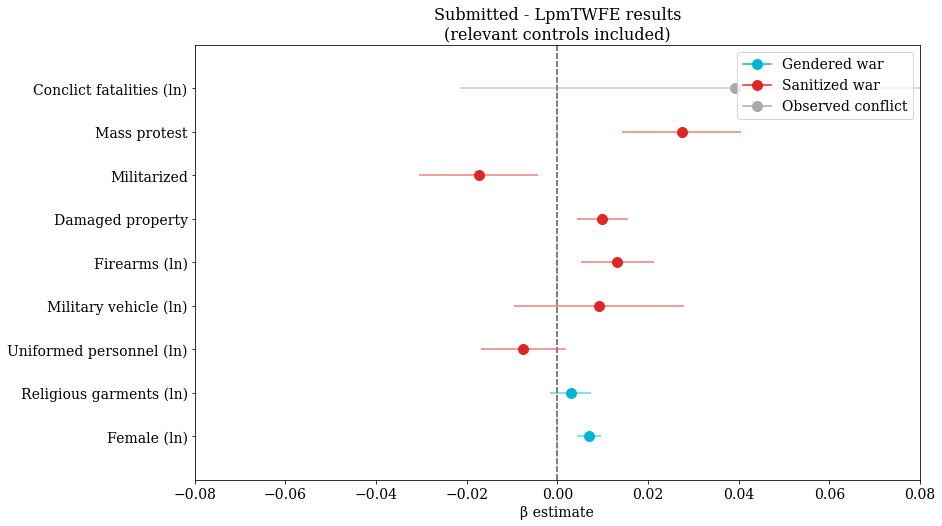

In [29]:
plt.figure(figsize = [13,8])

yticks = []
#yticks_l = []
yticks_l = list(results_dict.keys())
yticks_l = ['Female (ln)', 'Religious garments (ln)', 'Uniformed personnel (ln)', 'Military vehicle (ln)', 'Firearms (ln)', 'Damaged property', 'Militarized', 'Mass protest', 'Conclict fatalities (ln)']



for i,j in enumerate(results_dict.keys()):

    if j in ['lfemale', 'lgarments']:
        color = '#00b5d4'

    elif j == 'log_best':
        color = 'darkgray'

    else:
        color = '#dd2726'

    plt.scatter(results_dict[j][0], i+1, color = color, s = 100)

    plt.errorbar(results_dict[j][0], i+1, xerr = results_dict[j][1]*2, color = color, alpha = 0.6)
    plt.vlines(0,0,10, linestyle = 'dashed', color = 'gray', alpha = 0.6)

    yticks.append(i+1)
    #yticks_l.append(j)

plt.title('Submitted - LpmTWFE results\n(relevant controls included)', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(yticks, yticks_l, fontsize = 14)
plt.ylim(0, max(yticks) +1 )
plt.xlim(-0.08, 0.08)
plt.xlabel('β estimate', fontsize = 14)

gen_cap = mlines.Line2D([], [], color='#00b5d4', marker='o', markersize=10, label='Gendered war')
mil_cap = mlines.Line2D([], [], color='#dd2726', marker='o', markersize=10, label='Sanitized war')
leg_cap = mlines.Line2D([], [], color='darkgray', marker='o', markersize=10, label='Observed conflict')

plt.legend(handles=[gen_cap, mil_cap, leg_cap], fontsize = 14)

fig_path = f'/home/simon/Documents/Bodies/figures/frontline/results0.png'
plt.savefig(fig_path, bbox_inches="tight")

plt.show()